    Group Members:
- **Sajid Majeed (k-180957)**
- **Farooq Majeed (k-180910)**

In [1]:
import findspark
findspark.init('/home/admin123/spark-2.4.0-bin-hadoop2.7/')

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('IdsProject').getOrCreate()

In [4]:
chaseup_data = spark.read.csv('chaseup.csv', inferSchema=True, header=True)

In [5]:
chaseup_data.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



In [6]:
chaseup_data.describe().show()

+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|       Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|         Purchase|
+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|  count|            537577|    537577|537577|537577|           537577|       537577|                    537577|             537577|            537577|            370591|            164278|           537577|
|   mean|1002991.8470284257|      null|  null|  null|8.082710011775058|         null|        1.4692404461960729| 0.4087972513705013| 5.295546498455105| 9.84214403479847

In [7]:
chaseup_data.columns

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [8]:
chaseup_data.describe()

DataFrame[summary: string, User_ID: string, Product_ID: string, Gender: string, Age: string, Occupation: string, City_Category: string, Stay_In_Current_City_Years: string, Marital_Status: string, Product_Category_1: string, Product_Category_2: string, Product_Category_3: string, Purchase: string]

In [9]:
chaseup_data.head()

Row(User_ID=1000001, Product_ID='P00069042', Gender='F', Age='0-17', Occupation=10, City_Category='Lahore', Stay_In_Current_City_Years='2', Marital_Status=0, Product_Category_1=3, Product_Category_2=None, Product_Category_3=None, Purchase=8370)

In [10]:
# Data cleaning ( Dealing with Missing values)
# chaseup_data.na.drop(subset=['Product_ID']).show()

#### Removing Null values 
If i want to drop null values 
{chaseup_data.na.drop(subset=['Product_Category_2']).show()}

In [11]:
#Missing Values replacing with Mean values
from pyspark.sql.functions import mean
#Now calculating mean of each column and then replacing null values with mean value

mean_val_1 = chaseup_data.select(mean(chaseup_data['Product_Category_1'])).collect()
mean_val_2 = chaseup_data.select(mean(chaseup_data['Product_Category_2'])).collect()
mean_val_3 = chaseup_data.select(mean(chaseup_data['Product_Category_3'])).collect()

mean_sale_1 = mean_val_1[0][0]
mean_sale_2 = mean_val_2[0][0]
mean_sale_3 = mean_val_3[0][0]

print ('mean_sale_1 =', mean_sale_1)
print ('mean_sale_1 =', mean_sale_2)
print ('mean_sale_1 =', mean_sale_3)

mean_sale_1 = 5.295546498455105
mean_sale_1 = 9.842144034798471
mean_sale_1 = 12.669840149015693


In [12]:
first_product_category_mean = mean_sale_1
second_product_category_mean = mean_sale_2
third_product_category_mean = mean_sale_3

In [13]:
chaseup_data.na.fill(first_product_category_mean, ['Product_Category_1']).show()
chaseup_data.na.fill(second_product_category_mean, ['Product_Category_2']).show()
chaseup_data.na.fill(third__product_category_mean, ['Product_Category_3']).show()




+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F| 0-17|        10|       Lahore|                         2|             0|                 3|              null|              null|    8370|
|1000001| P00248942|     F| 0-17|        10|       Lahore|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F| 0-17|        10|       Lahore|                         2|             0|                12|              null|              null|    1422

NameError: name 'third__product_category_mean' is not defined

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
chaseUp_data = pd.read_csv('chaseup.csv')

In [15]:
chaseUp_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,Lahore,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,Lahore,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,Lahore,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,Lahore,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,Islamabad,4+,0,8,NaN,NaN,7969


In [16]:
## Data Cleaning
missing_values  = chaseUp_data.isnull().sum().sort_values(ascending=False)

In [17]:
missing_values = missing_values[missing_values > 0]/chaseUp_data.shape[0]

In [18]:
chaseUp_data = chaseUp_data.fillna(0)

In [19]:
missing_values = chaseUp_data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/chaseUp_data.shape[0]

In [20]:
chaseUp_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [21]:
gender = np.unique(chaseUp_data['Gender'])
gender

array(['F', 'M'], dtype=object)

In [22]:
## assigning Male to 1 and Female to 0
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
chaseUp_data['Gender'] = chaseUp_data['Gender'].apply(map_gender)

In [23]:
## Now moving towards age Parameter
age = np.unique(chaseUp_data['Age'])
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [24]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
chaseUp_data['Age'] = chaseUp_data['Age'].apply(map_age)

In [25]:
# Now looking to City_Category.
city_category = np.unique(chaseUp_data['City_Category'])
city_category

array(['Islamabad', 'Karachi', 'Lahore'], dtype=object)

In [26]:
# Mapping
def map_city_categories(city_category):
    if city_category == 'Islamabad':
        return 2
    elif city_category == 'Karachi':
        return 1
    else:
        return 0
chaseUp_data['City_Category'] = chaseUp_data['City_Category'].apply(map_city_categories)

In [27]:
city_stay = np.unique(chaseUp_data['Stay_In_Current_City_Years'])
city_stay

array(['0', '1', '2', '3', '4+'], dtype=object)

In [28]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
#             current_years = stay
#             current_years = current_years.astype(int)
#             return current_years
chaseUp_data['Stay_In_Current_City_Years'] = chaseUp_data['Stay_In_Current_City_Years'].apply(map_stay)

In [29]:
# Droping column User_ID and Product_ID
cols = ['User_ID','Product_ID']
chaseUp_data.drop(cols, inplace = True, axis =1)

In [30]:
# lets see how new Dataframe looks like 
chaseUp_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969


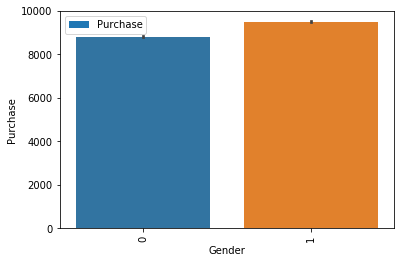

In [31]:
# NOW Start EDA 
chaseUp_data[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = chaseUp_data)
plt.show()

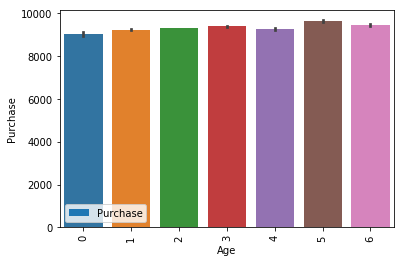

In [32]:
chaseUp_data[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = chaseUp_data)
plt.show()

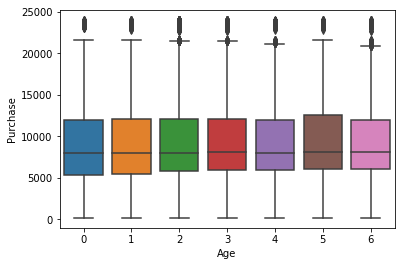

In [33]:
#  will also plot some boxplots to study the deviation in Age vs Purchase
sns.boxplot('Age','Purchase', data = chaseUp_data)
plt.show()

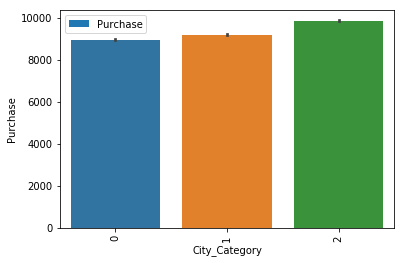

In [34]:
# Lets see how city category affects the purchase.
chaseUp_data[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = chaseUp_data)
plt.show()

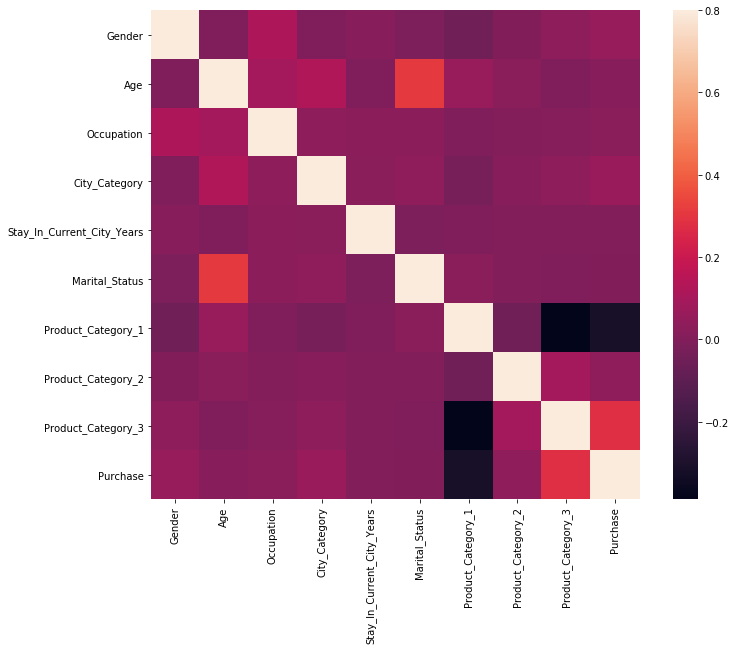

In [35]:
# Let's now draw a heatmap to clearly see what are the correlations here
corrmat = chaseUp_data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

1. Product_Category_1 has a negative correlation with Purchase.
2. Maritial_Status and Age are strongly correlated. As Expected.
3. Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.

In [36]:
mean_cat_1 = chaseUp_data['Product_Category_1'].mean()
mean_cat_2 = chaseUp_data['Product_Category_2'].mean()
mean_cat_3= chaseUp_data['Product_Category_3'].mean()
print(f"PC1: {mean_cat_1} \n PC2: {mean_cat_2} \n PC3 : {mean_cat_3}")

PC1: 5.295546498455105 
 PC2: 6.784907092379324 
 PC3 : 3.871772787898292


According to this **Product_Category_3** is lesser as campare to **Product_Category_1** and  **Product_Category_2** and has **Strong Correlation**

## Applying ML Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


df = chaseUp_data = pd.read_csv('chaseup.csv')

print('<Contain NaNs?>')
print(df.isnull().any())
missing_ser_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

In [38]:
df.fillna(0,inplace=True)

In [39]:
for col in df.columns:
    print('{} unique element: {}'.format(col,df[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 18
Product_Category_3 unique element: 16
Purchase unique element: 17959


Text(0,0.5,'Count')

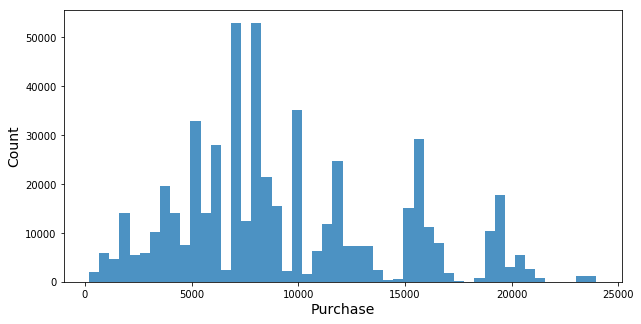

In [40]:
plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0.5,1,'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

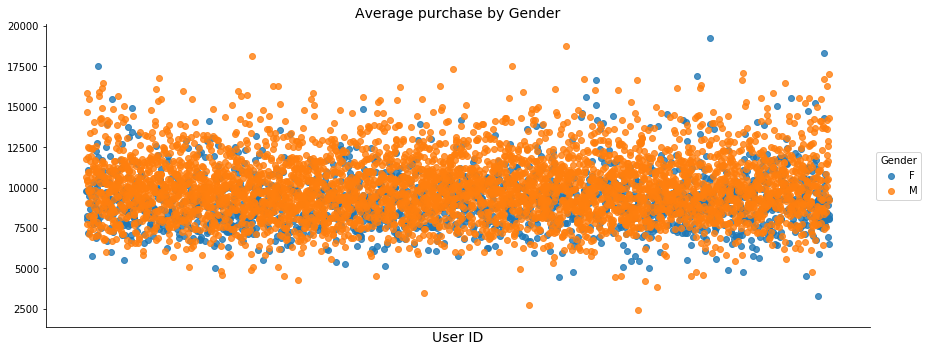

<Figure size 1440x360 with 0 Axes>

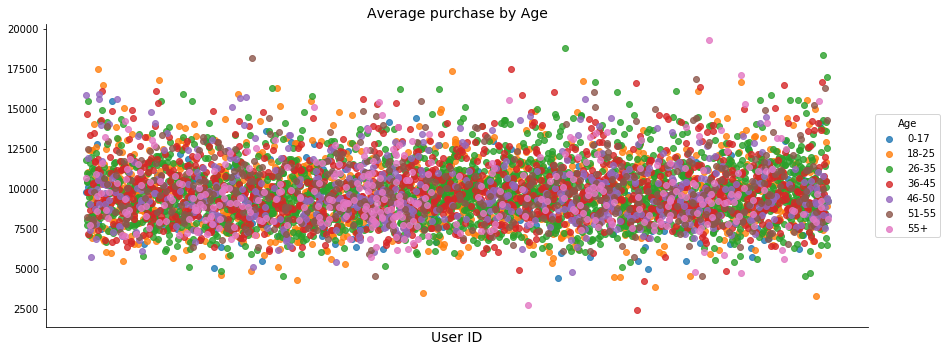

In [41]:
df_Apurchase_by_UID_Gender = df.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_UID_Age = df.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

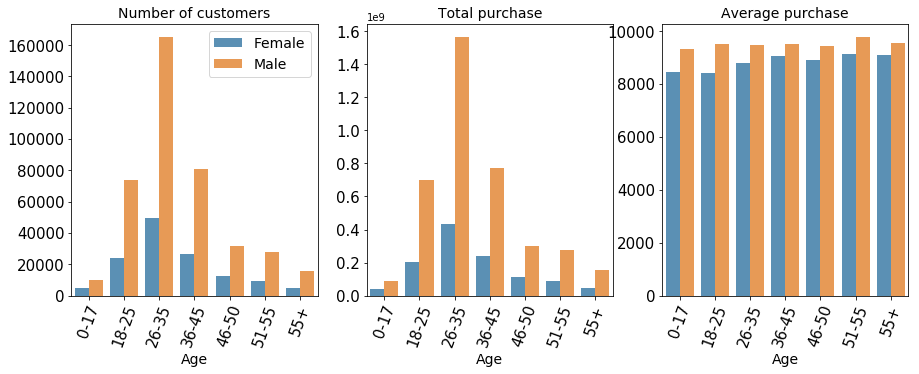

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('Age',order=age_order,hue='Gender',data=df,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(132)
df_Tpurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)


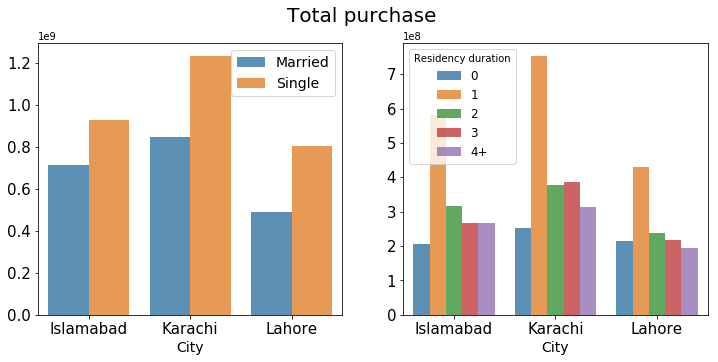

In [43]:
df['Marital_Status_label']=np.where(df['Marital_Status'] == 0,'Single','Married')
df_Tpurchase_by_City_Marital = df.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = df.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)
df.drop('Marital_Status_label',axis=1,inplace=True)

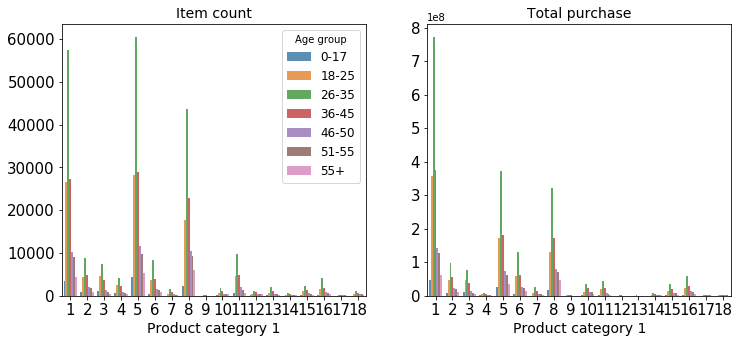

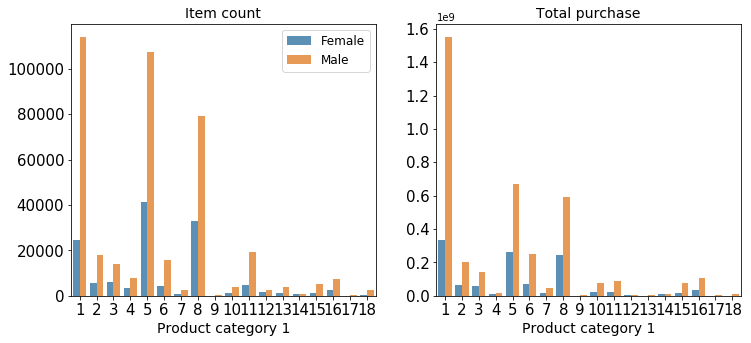

In [44]:

df_Tpurchase_by_PC1_Age = df.groupby(['Product_Category_1','Age']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Age',data=df,alpha = 0.8,hue_order=age_order)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Age',data=df_Tpurchase_by_PC1_Age,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

df_Tpurchase_by_PC1_Gender = df.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Gender',data=df,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_Tpurchase_by_PC1_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

In [46]:
le_U_ID = LabelEncoder()
df['User_ID'] = le_U_ID.fit_transform(df['User_ID'])
le_P_ID = LabelEncoder()
df['Product_ID'] = le_P_ID.fit_transform(df['Product_ID'])
df['Gender'] = np.where(df['Gender']=='M',1,0) # Female: 0, Male: 1
df_Age = pd.get_dummies(df.Age)
df_CC = pd.get_dummies(df.City_Category)
df_SIC = pd.get_dummies(df.Stay_In_Current_City_Years)
df_encoded = pd.concat([df,df_Age,df_CC,df_SIC],axis=1)
df_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

## Feature engineering for model fitting

In [47]:
df_frac = df_encoded.sample(frac=0.02, random_state=100)
X = df_frac.drop(['Purchase'], axis=1)
y = df_frac['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Importance

Best parameter: {'n_estimators': 300}
Best score: 2982.32


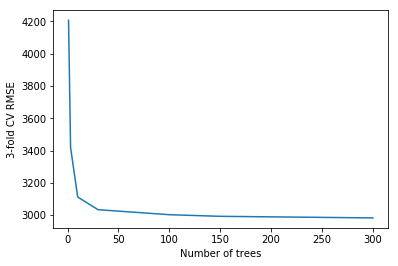

In [48]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)
plt.figure()
plt.plot(list(param_grid.values())[0],(-1*grid_rf.cv_results_['mean_test_score'])**0.5)
plt.xlabel('Number of trees')
plt.ylabel('3-fold CV RMSE')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

In [49]:

train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(max_depth=7, n_estimators=150),
X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')

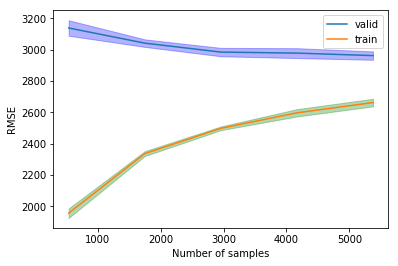

In [50]:
train_scores = (-1*train_scores)**0.5
valid_scores = (-1*valid_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()

Text(0.5,0,'relative importance')

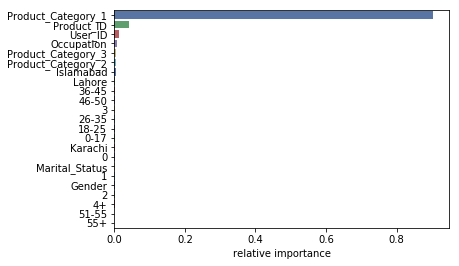

In [51]:
rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
f_im = rf.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

Text(0.5,0,'relative importance')

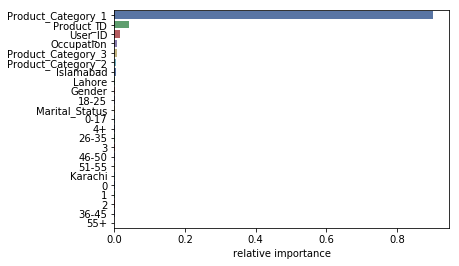

In [52]:
rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
f_im = rf.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')


In [53]:
X = df_encoded.drop(['Purchase'], axis=1)
y = df_encoded['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
y_predicted = rf.predict(X_test_scaled)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_predicted)**0.5))

Test set RMSE: 2912.214


### Conslusion

It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:
> - In this project, the **chase up** dataset has been explored. While EDA revealed some interesting relationships among different features, for the purpose of predicting customer's Purchase, the top three features useful included Product_Category_1, Product_ID and User_ID. With a roughly tuned Random Forest model with max_depth = 9 and n_estimators = 300, the RMSR for predicting Purchase of this model was shown to be ~2912